In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split


import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [2]:
pd.set_option("max_column", None)
# Apply the ggplot style to matplotlib
plt.style.use('ggplot')

In [4]:
df = pd.read_csv("data/mitbih_train.csv", header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,0.147059,0.132353,0.127451,0.134804,0.137255,0.112745,0.107843,0.105392,0.107843,0.098039,0.093137,0.102941,0.100490,0.105392,0.102941,0.117647,0.105392,0.122549,0.127451,0.142157,0.147059,0.144608,0.174020,0.230392,0.237745,0.247549,0.230392,0.225490,0.198529,0.176471,0.132353,0.125000,0.117647,0.122549,0.112745,0.129902,0.115196,0.083333,0.000000,0.066176,0.306373,0.612745,0.860294,1.000000,0.958333,0.745098,0.303922,0.164216,0.205882,0.164216,0.102941,0.095588,0.090686,0.100490,0.095588,0.098039,0.093137,0.098039,0.095588,0.112745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,0.108262,0.082621,0.079772,0.074074,0.014245,0.011396,0.062678,0.051282,0.056980,0.048433,0.028490,0.031339,0.076923,0.025641,0.028490,0.037037,0.094017,0.085470,0.039886,0.059829,0.074074,0.079772,0.091168,0.099715,0.108262,0.088319,0.091168,0.065527,0.085470,0.088319,0.076923,0.082621,0.096866,0.099715,0.133903,0.102564,0.039886,0.065527,0.074074,0.082621,0.085470,0.056980,0.045584,0.102564,0.039886,0.011396,0.017094,0.031339,0.005698,0.008547,0.031339,0.051282,0.056980,0.088319,0.065527,0.011396,0.056980,0.039886,0.039886,0.025641,0.002849,0.019943,0.025641,0.011396,0.028490,0.019943,0.022792,0.034188,0.014245,0.051282,0.068376,0.139601,0.287749,0.527066,0.777778,1.000000,0.888889,0.492877,0.190883,0.088319,0.062678,0.034188,0.00000,0.034188,0.017094,0.002849,0.000000,0.048433,0.048433,0.054131,0.042735,0.054131,0.059829,0.062678,0.071225,0.076923,0.099715,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,0.054054,0.037838,0.043243,0.021622,0.045946,0.035135,0.056757,0.035135,0.037838,0.032432

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [7]:
df[187].unique()

array([0., 1., 2., 3., 4.])

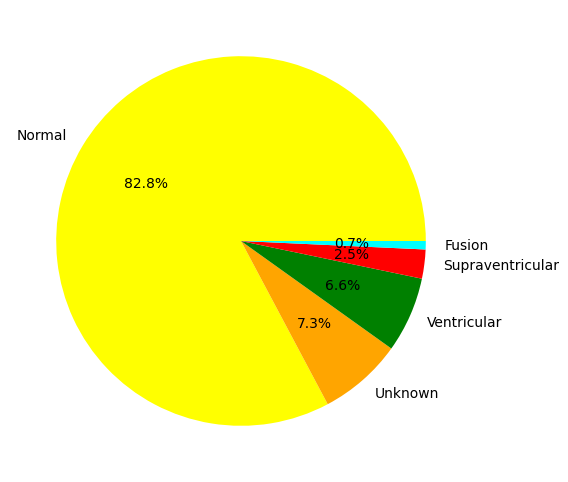

In [8]:
plt.figure(figsize=(6,6))
_ = plt.pie(df[187].value_counts(), labels=["Normal","Unknown","Ventricular","Supraventricular","Fusion"],
        colors= ['yellow','orange','green','red','cyan'],
        autopct='%3.1f%%')

In [9]:
color = ['blue','red','green','yellow','purple']
labels = ["Normal","Supraventricular","Ventricular",
         "Fusion","Unknown"]

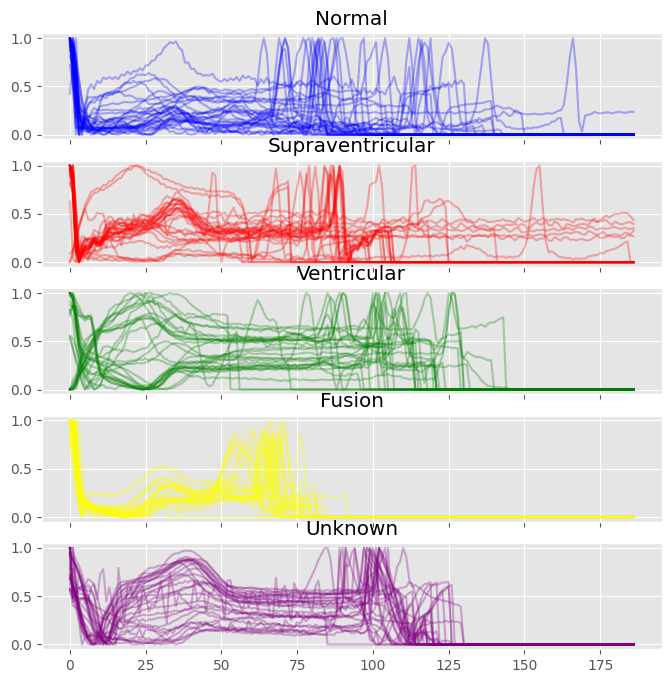

In [10]:
fig, ax = plt.subplots(5,  sharex=True, sharey=True,figsize=(8,8))
for j in range(5):
    for i in range(30):
        t = ax[j].plot((df[df[187] == j].iloc[i])[:-1], color=color[j], alpha=0.3)
    ax[j].title.set_text(labels[j])

In [11]:
x = df.drop(187, axis=1)
y = df[187].astype(int)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Tree-based models: XGBoost, LightGBM, Random Forest
model_xgb = XGBClassifier(random_state=42)
model_lgbm = LGBMClassifier(random_state=42)
model_rf = RandomForestClassifier(random_state=42)

In [14]:
model_lgbm.fit(X_train, y_train)
y_pred_lgbm = model_lgbm.predict(X_test)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
accuracy_lgbm

0.978699103420707

In [15]:
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [16]:
y_pred_xgb = model_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_xgb

0.9802409913768488

In [17]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.9751584718177145

In [19]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(70043, 187)
(70043,)
(17511, 187)
(17511,)


In [20]:
model = keras.Sequential()
model.add(keras.layers.Conv1D(64,6, activation="relu", input_shape=(187,1)))
model.add(keras.layers.Conv1D(128,6, activation="relu"))
model.add(keras.layers.Conv1D(256,6, activation="relu"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16,activation="relu"))
model.add(keras.layers.Dense(8,activation="relu"))
model.add(keras.layers.Dense(5, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 182, 64)           448       
                                                                 
 conv1d_1 (Conv1D)           (None, 177, 128)          49280     
                                                                 
 conv1d_2 (Conv1D)           (None, 172, 256)          196864    
                                                                 
 flatten (Flatten)           (None, 44032)             0         
                                                                 
 dense (Dense)               (None, 16)                704528    
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 5)                 4

In [21]:
model.compile(optimizer="adam",
              loss='SparseCategoricalCrossentropy',
              metrics = "accuracy")

In [22]:
# Create the EarlyStopping callback
early_stopping = EarlyStopping(patience=10, 
                               monitor='val_accuracy', 
                               restore_best_weights=True)

# Assuming you have already defined your model as 'model'
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=128,
                    epochs=100, 
                    verbose=1, 
                    callbacks=[early_stopping])

Epoch 1/100
548/548 [==============================] - 311s 563ms/step - loss: 0.2342 - accuracy: 0.9358 - val_loss: 0.1186 - val_accuracy: 0.9670
Epoch 2/100
548/548 [==============================] - 360s 658ms/step - loss: 0.1110 - accuracy: 0.9694 - val_loss: 0.0983 - val_accuracy: 0.9741
Epoch 3/100
548/548 [==============================] - 342s 625ms/step - loss: 0.0885 - accuracy: 0.9742 - val_loss: 0.0793 - val_accuracy: 0.9773
Epoch 4/100
548/548 [==============================] - 359s 655ms/step - loss: 0.0709 - accuracy: 0.9792 - val_loss: 0.0722 - val_accuracy: 0.9794
Epoch 5/100
548/548 [==============================] - 349s 638ms/step - loss: 0.0605 - accuracy: 0.9818 - val_loss: 0.0689 - val_accuracy: 0.9810
Epoch 6/100
548/548 [==============================] - 2366s 4s/step - loss: 0.0528 - accuracy: 0.9839 - val_loss: 0.0662 - val_accuracy: 0.9824
Epoch 7/100
548/548 [==============================] - 363s 637ms/step - loss: 0.0451 - accuracy: 0.9864 - val_loss: 0.0

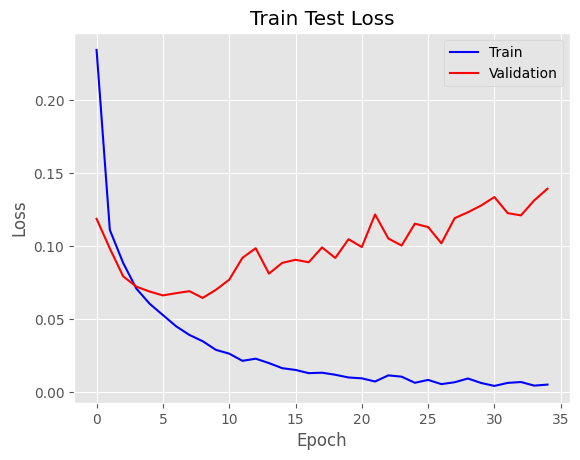

In [25]:
plt.title("Train Test Loss")
plt.plot(history.history["loss"], color="b", label="Train")
plt.plot(history.history["val_loss"], color="r", label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

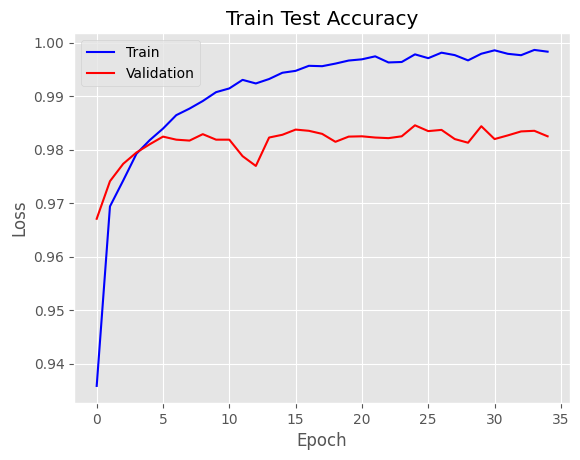

In [26]:
plt.title("Train Test Accuracy")
plt.plot(history.history["accuracy"], color="b", label="Train")
plt.plot(history.history["val_accuracy"], color="r", label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [ ]:
preds = model.predict(X_test)
preds1 = [np.argmax(i) for i in preds]
accuracy_score(y_test, preds1)

In [30]:
class ECGModelEvaluator:
    def __init__(self, models, model_names, num_classes):
        """
        Initialize the ECGModelEvaluator.

        Parameters:
        models (list): List of trained models for evaluation.
        model_names (list): List of corresponding model names.
        num_classes (int): Number of classes in the classification task.
        """
        self.models = models
        self.model_names = model_names
        self.num_classes = num_classes
        self.metrics = {
            'Accuracy': accuracy_score,
            'Precision': precision_score,
            'Recall': recall_score,
            'F1 Score': f1_score
        }

    def evaluate_models(self, X_test, y_test):
        """
        Evaluate the models using different metrics.

        Parameters:
        X_test (numpy.ndarray): Test data features.
        y_test (numpy.ndarray): Test data labels.

        Returns:
        pd.DataFrame: DataFrame containing evaluation results for each model and metric.
        """
        evaluation_results = []
        
        for model, model_name in zip(self.models, self.model_names):
            if '1D CNN' in model_name:
                y_pred_probs = model.predict(X_test)
                y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to predicted labels
            else:
                y_pred = model.predict(X_test)
            
            results = {'Model': model_name}
            
            for metric_name, metric_func in self.metrics.items():
                if metric_name == 'Accuracy':
                    metric_value = metric_func(y_test, y_pred)
                else:
                    metric_value = metric_func(y_test, y_pred, average='weighted')
                results[metric_name] = metric_value
            
            evaluation_results.append(results)
        
        evaluation_df = pd.DataFrame(evaluation_results)
        return evaluation_df

In [31]:
model_names = ['XGBoost', 'LightGBM', 'Random Forest', '1D CNN']
models = [model_xgb, model_lgbm, model_rf, model]
num_classes = len(np.unique(y_test))

In [32]:
evaluator = ECGModelEvaluator(models, model_names, num_classes)
evaluation_results_df = evaluator.evaluate_models(X_test, y_test)

548/548 [==============================] - 1s 2ms/step


In [ ]:
evaluation_results_df = evaluator.evaluate_models(X_train, y_train)

In [33]:
evaluation_results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,XGBoost,0.980241,0.979807,0.980241,0.979338
1,LightGBM,0.978699,0.978074,0.978699,0.977730
2,Random Forest,0.975158,0.974978,0.975158,0.973572
3,1D CNN,0.982639,0.982133,0.982639,0.982195


In [34]:
class ConfusionMatrixPlotter:
    def __init__(self, model, model_name, class_names=None):
        """
        Initialize the ConfusionMatrixPlotter.

        Parameters:
        model : Trained model for evaluation.
        model_name : Name of the model.
        class_names : List of class names for labeling the confusion matrix.
        """
        self.model = model
        self.model_name = model_name
        self.class_names = class_names

    def plot_confusion_matrix(self, X_test, y_test, normalize=False, cmap='Greys'):
        """
        Plot the confusion matrix.

        Parameters:
        X_test (numpy.ndarray): Test data features.
        y_test (numpy.ndarray): Test data labels.
        normalize (bool): Whether to normalize the confusion matrix.
        cmap (str): Colormap for the heatmap.

        Returns:
        None
        """
#         y_pred = 
        y_pred = self.model.predict(X_test) if self.model_name != "1D CNN" else [np.argmax(i) for i in self.model.predict(X_test)]
            
        cm = confusion_matrix(y_test, y_pred)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print(cm)

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap=cmap,  cbar=False)
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title(f'Confusion Matrix - {self.model_name}')
        plt.show()

XGBoost

[[14447    15    23     3     6]
 [  132   306     6     0     1]
 [   82     0  1064     7     5]
 [   23     0    15    90     0]
 [   23     2     3     0  1258]]


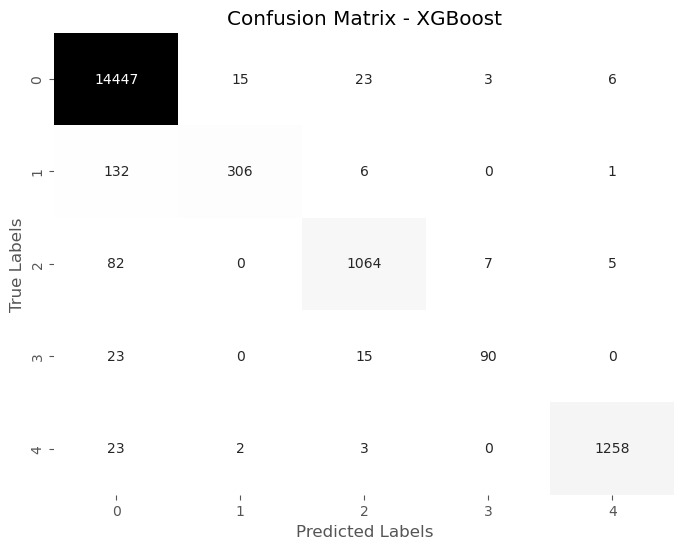



LightGBM

[[14437    15    23    13     6]
 [  134   304     6     0     1]
 [   81     3  1058    10     6]
 [   30     0    17    81     0]
 [   26     1     1     0  1258]]


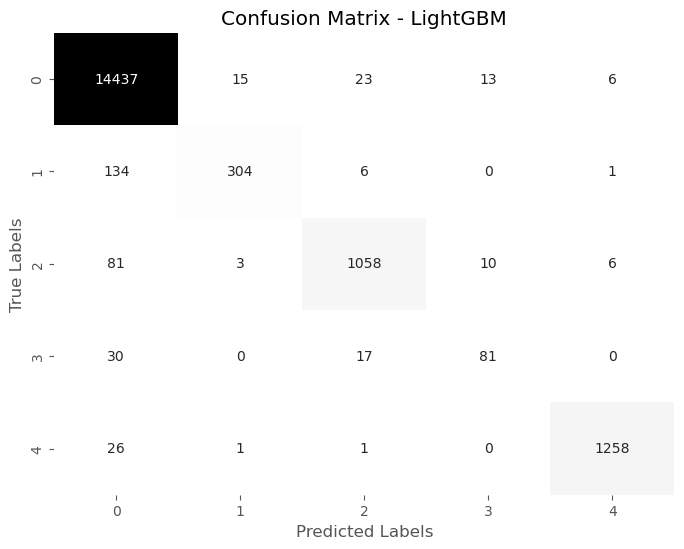



Random Forest

[[14467     8    13     2     4]
 [  164   275     5     0     1]
 [  120     1  1029     5     3]
 [   40     0    12    76     0]
 [   55     0     2     0  1229]]


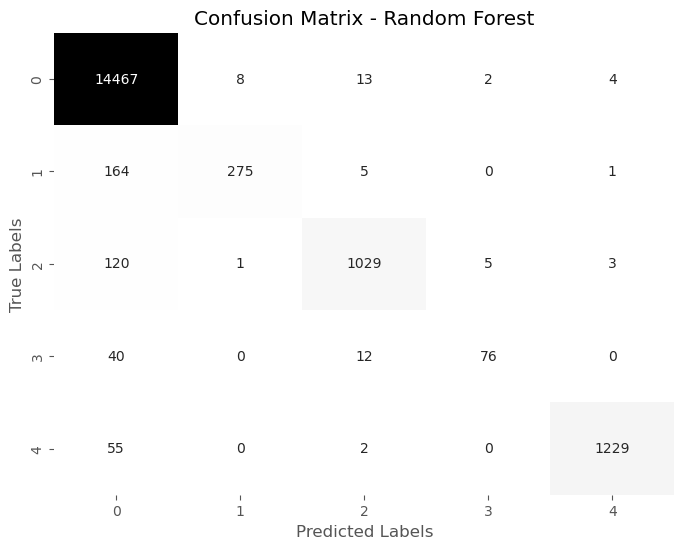



1D CNN

548/548 [==============================] - 1s 2ms/step
[[14400    43    27     7    17]
 [   97   339     9     0     0]
 [   43     3  1100     4     8]
 [   17     0    19    91     1]
 [    6     0     3     0  1277]]


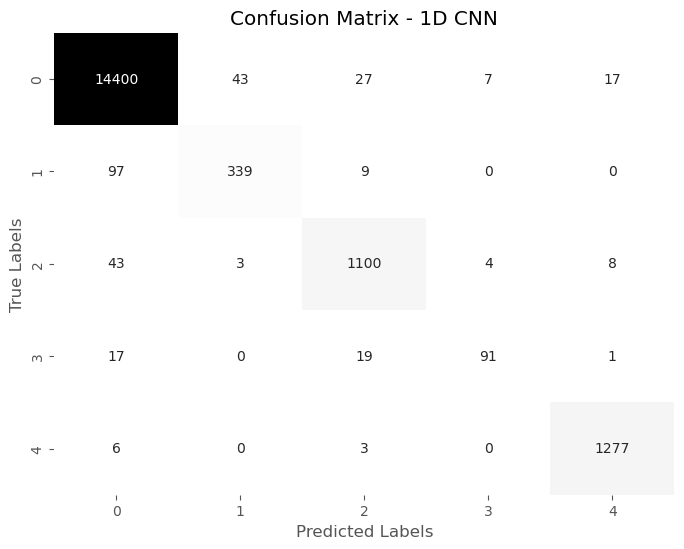

In [36]:
model_names = ['XGBoost', 'LightGBM', 'Random Forest', '1D CNN']
models = [model_xgb, model_lgbm, model_rf, model]

for clf, model_name in zip(models, model_names):
    print(model_name)
    print()
    plotter = ConfusionMatrixPlotter(clf, model_name)
    plotter.plot_confusion_matrix(X_test, y_test)
    print()
    print()